In [1]:
from ml_mmpa import master_functions
import pandas as pd

from sklearn.manifold import TSNE

#chem

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.rdmolops import FastFindRings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RDKit WARNING: [13:56:20] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# carry out mmpa

# clean mmpa
    # first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands
    # Second step is finding unique transforms and calculating paired t-test
    # Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
    
# prodcue functions for mmpa
# summarise results in a table
#analyse the results

### MMPA

In [1]:
import sys

def abc(xyz):
    print(xyz)

if __name__ == "__main__":
    abc(sys.argv[1])

-f


In [4]:
# in the console run: 

# ! ./ml_mmpa/master_mmpa.sh data/efflux_mmpa.csv efflux;

# it will result in new items in the 'out' folder.


In [38]:
# Next we process that output:

output = pd.read_csv('out/index_efflux_final.csv')

In [3]:
output

compound_structure_A  \
0            CN\C(NCCSCc1ccc(CN(C)C)o1)=C/[N+]([O-])=O.Cl   
1          C(=C/c(cc1)ccc1F)(/NC(c2ccccc2)=O)\C(=O)OC(C)C   
2        C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(=O)NC(C(C)C)C(O)=O   
3       C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(NCC=C)=O)\NC(c2...   
4       C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...   
...                                                   ...   
827187         N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O   
827188          N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O   
827189                 C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-]   
827190                 C1(=O)N(C)Sc2c1ccc(c2)[N+](=O)[O-]   
827191         N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O   

                                     compound_structure_B  idsmiles_A  \
0               CN\C(NCCSCc1csc(CN(C)C)n1)=C/[N+]([O-])=O        9393   
1             C(=C\c(cc1)ccc1F)(/C(OCC)=O)\NC(c2ccccc2)=O       17912   
2                    C(=C/c(cc1)ccc1F)(/NC(C)=O)\C(OCC)=O       47259   
3       C(=C\c(cc1)cc(c1OC(C)=O)OC)(/C(=O)NCc2ccccc2)\...       10564   
4       C(=C/c(cc1)cc(c1OC(C)=O)OC)(/NC(c2ccccc2)=O)\C...        9068   
...                                                   ...         ...   
827187          N1(c2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O       26921   
827188                  [N+](=O)([O-])c(cc1)cc(c12)SNC2=O        6632   
827189         N1(Cc2ccccc2)Sc3c(ccc(c3)[N+](=O)[O-])C1=O       24593   
827190                  [N+](=O)([O-])c(cc1)cc(c12)SNC2=O       24593   
827191                  [N+](=O)([O-])c(cc1)cc(c12)SNC2=O       26921   

        idsmiles_B                                             smirks  \
0            20542  [*:1]NCCSCc1ccc([*:2])o1>>[*:1]NCCSCc1csc([*:2...   
1            44948                    [*:1]C(=O)OC(C)C>>[*:1]C(=O)OCC   
2            23556           [*:1]C(=O)NC(C(=O)O)C(C)C>>[*:1]C(=O)OCC   
3             9068              [*:1]C(=O)NCC=C>>[*:1]C(=O)NCc1ccccc1   
4            25097         [*:1]C(=O)NCc1ccccc1>>[*:1]C(=O)Nc1ccccc1C   
...            ...                                                ...   
827187        6632                      [*:1]Cc1ccccc1>>[*:1]c1ccccc1   
827188       46144                            [*:1]c1ccccc1>>[*:1][H]   
827189       26921                             [*:1]C>>[*:1]Cc1ccccc1   
827190       46144                                   [*:1]C>>[*:1][H]   
827191       46144                           [*:1]Cc1ccccc1>>[*:1][H]   

                                            common_core  measurement_A  \
0                [*:1]/C(=C/[N+](=O)[O-])NC.[*:2]CN(C)C          16.52   
1                 [*:1]/C(=C/c1ccc(F)cc1)NC(=O)c1ccccc1           6.67   
2                        [*:1]/C(=C/c1ccc(F)cc1)NC(C)=O          -1.58   
3       [*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1           6.09   
4       [*:1]/C(=C/c1ccc(OC(C)=O)c(OC)c1)NC(=O)c1ccccc1          18.06   
...                                                 ...            ...   
827187               [*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O           8.97   
827188               [*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O           8.72   
827189               [*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O          25.55   
827190               [*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O          25.55   
827191               [*:1]n1sc2cc([N+](=O)[O-])ccc2c1=O           8.97   

        measurement_B  measurement_delta                        LHS  \
0                6.05             -10.47   [*:1]NCCSCc1ccc([*:2])o1   
1                2.79              -3.88           [*:1]C(=O)OC(C)C   
2                5.93               7.51  [*:1]C(=O)NC(C(=O)O)C(C)C   
3               18.06              11.97            [*:1]C(=O)NCC=C   
4               13.22              -4.84       [*:1]C(=O)NCc1ccccc1   
...               ...                ...                        ...   
827187           8.72              -0.25             [*:1]Cc1ccccc1   
827188           2.22              -6.50              [*:1]c1ccccc1   
827189           8.97 

In [7]:
# first step is making sure the length of the core is longer (more heavy atoms) than either of the transform hands

output_len = master_functions.clean_mmpa_pairs_len(output) # filter pairs by len LHS & RHS vs CORE

KeyboardInterrupt: 

In [ ]:
'''
Second step is finding unique transforms and calculating paired t-test
It will produce dataframe with columns: smirks	dof	t-stat	p-val (t-test)	measurement_delta	std	sem
Sorted by descending dof

At this point both positive and negative transforms are present.
'''
output_len_stat = master_functions.stat_it_2(output_len)

In [ ]:
# you should save this file..pickle?

output_len_stat.to_pickle("out/output_len_stat.pkl")

output_len_stat.head(5)

# load pickle back in

In [2]:

output_len_stat = pd.read_pickle("out/output_len_stat.pkl") 


In [3]:
'''
Third step is filtering p-val based on thresold and deciding weather to keep both positive and negative transforms
Output is the significant transforms sorted by measurement delta

This is a great output to consider, but we can do one better by turning the transforms into functional groups
'''

mmpa_zero_pos = master_functions.zero_in(output_len_stat, 0.05, pos_only=True)

# Add split columns to the dataframe

mmpa_zero_pos = master_functions.split_transition(mmpa_zero_pos, 'smirks')


Number of unique transforms where p-val < 0.05 is 2836
Split between 2836 positive transforms and 0 negative transforms


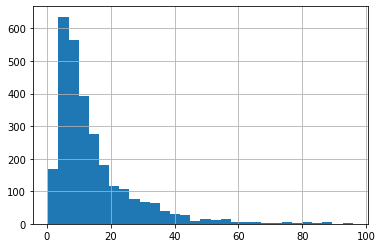

In [4]:
mmpa_zero_pos.measurement_delta.hist(bins=30)

In [8]:
mmpa_zero_pos.head(10)

smirks  dof      t-stat  \
0  [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O    3  107.830725   
1  [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...    2   19.757254   
2  [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...    2   19.569437   
3  [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...    2   19.372677   
4                    [*:1]C1CC1>>[*:1]c1ccc2ccccc2n1    3    4.139237   
5            [*:1]C(=O)c1ccc(N)cc1>>[*:1]c1cccc(N)c1    2   23.769812   
6          [*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1cccc(N)c1    2   23.769812   
7            [*:1]C(=O)c1ccc(N)cc1>>[*:1]c1ccc(N)cc1    2   23.287423   
8          [*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1ccc(N)cc1    2   23.287423   
9  [*:1]CNC(=O)CC(CO)NC[*:2]>>[*:1]N=Nc1nc(C)c(N=...    3  110.123051   

   p-val (t-test)  measurement_delta        std        sem  \
0        0.000002          95.750000   1.775932   0.887966   
1        0.002552          88.363333   7.746511   4.472450   
2        0.002601          87.523333   7.746511   4.472450   
3        0.002654          86.643333   7.746511   4.472450   
4        0.025600          86.630000  41.857952  20.928976   
5        0.001765          84.753333   6.175778   3.565587   
6        0.001765          84.753333   6.175778   3.565587   
7        0.001839          83.033333   6.175778   3.565587   
8        0.001839          83.033333   6.175778   3.565587   
9        0.000002          82.365000   1.495872   0.747936   

                            LHS                                  RHS  
0           [*:1]CNC(=O)CO[*:2]         [*:1]N1C(=O)C(O)=CC1([*:2])O  
1  [*:1]/C=N/C([*:2])/N=C/[*:3]  [*:1][P+]([*:2])([*:3])Cc1cccc(N)c1  
2  [*:1]/C=N/C([*:2])/N=C/[*:3]    [*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3]  
3  [*:1]/C=N/C([*:2])/N=C/[*:3]  [*:1][P+]([*:2])([*:3])Cc1ccc(N)cc1  
4                    [*:1]C1CC1                  [*:1]c1ccc2ccccc2n1  
5         [*:1]C(=O)c1ccc(N)cc1                     [*:1]c1cccc(N)c1  
6        [*:1]CC(=O)c1ccc(N)cc1                    [*:1]Cc1cccc(N)c1  
7         [*:1]C(=O)c1ccc(N)cc1                     [*:1]c1ccc(N)cc1  
8        [*:1]CC(=O)c1ccc(N)cc1                    [*:1]Cc1ccc(N)cc1  
9     [*:1]CNC(=O)CC(CO)NC[*:2]      [*:1]N=Nc1nc(C)c(N=N[*:2])[nH]1

## New features

In [11]:
features_2_all_neg, l_feats_2_neg, r_feats_2_neg = master_functions.calculate_fractions_mk5(mmpa_zero_pos)


  0%|          | 0/2836 [00:00<?, ?it/s]

/cluster/uz_lab/dgurvic/git_projects/efflux_mmpa
Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


 64%|██████▎   | 1807/2836 [00:30<00:14, 69.71it/s]RDKit ERROR: [16:15:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10
RDKit ERROR: 
 64%|██████▍   | 1820/2836 [00:30<00:20, 48.65it/s]

Error:  1811 ['[*:1]N1C(=O)C(O)=CC1([*:2])O' '[*:1][P+]([*:2])([*:3])Cc1cccc(N)c1'
 '[*:1]Nc1cn([*:2])c(CCC)[n+]1[*:3]' ... '[*:1][H]' '[*:1][H]' '[*:1][H]']


100%|██████████| 2836/2836 [00:46<00:00, 61.23it/s]


In [8]:
features_2_all_neg

0 26 28 42 43 > 2 ester groups 1 - Alkane group  \
0     0  0  0  0  0                0                0   
1     0  0  0  0  0                0               -1   
2     0  0  0  0  0                0                0   
3     0  0  0  0  0                0               -1   
4     0  0  0  0  0                0               -1   
...  .. .. .. .. ..              ...              ...   
2831  0  0  0  0  0                0                0   
2832  0  0  0  0  0                0                0   
2833  0  0  0  0  0                0               -1   
2834  0  0  0  0  0                0                0   
2835  0  0  0  0  0                0                0   

     1,2-Dicarbonyl not in ring 10 - Aldehyde 11 - Acetate group  ...  \
0                             0             0                  0  ...   
1                             0             0                  0  ...   
2                             0             0                  0  ...   
3                             0             0                  0  ...   
4                             0             0                  0  ...   
...                         ...           ...                ...  ...   
2831                          0             0                  0  ...   
2832                          0             0                  0  ...   
2833                          0             0                  0  ...   
2834                          0             0                  0  ...   
2835                          0             0                  0  ...   

     Ugly P compounds Unacceptable atoms Unbranched chain  \
0                   0                  0                0   
1                   0                  0                0   
2                   0                  0                0   
3                   0                  0                0   
4                   0                  0                0   
...               ...                ...              ...   
2831                0                  0                0   
2832                0                  0                0   
2833                0                  0                0   
2834                0                  0                0   
2835                0                  0                0   

     Undesirable_elements_salts Vinyl michael acceptor1  \
0                             0                       1   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
2831                          0                       0   
2832                          0                       0   
2833                          0                       0   
2834                          0                       0   
2835                          0                       0   

     Vinyl michael acceptor2 Vinyl_halide Vinyl_sulphone  \
0                          0            0              0   
1                          0            0              0   
2                          0            0              0   
3                          0            0              0   
4                          0            0              0   
...                      ...          ...            ...   
2831                       0            0              0   
2832                       0            0              0   
2833                       0            0              0   
2834                       0            0              0   
2835                       0            0              0   

                                                 smirks    target  
0     [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O     95.75  
1     [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...   88.3633  
2     [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...   87.5233  
3     [*:

In [ ]:
mmpa_zero_pos.iloc[1811]

In [10]:
# to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

# features_all_dropped_neg = features_2_all_neg.drop(to_drop, axis = 1)

# l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
# r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

# fractions_to_drop=['fr_ketone_Topliss', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_methoxy', 'fr_C_O', 'fr_phenol_noOrthoHbond' ]
# fractions above are kept as significant but not looked at on the exchange

fr_sig_descriptors_neg = master_functions.find_sig_feats_mk2(l_feats_2_neg, r_feats_2_neg, 0.01)

Found significant fractions:  100


In [11]:
fr_sig_descriptors_neg

0  13 - Ether  15 - Secondary amine group  16 - Tertiary amine  \
0  0.000003    0.001570                    0.008988         1.169302e-12   
1 -4.707885   -3.164476                    2.614318        -7.141382e+00   

   17 - Aromatic amine  18 - Pyridine  19 - CCN  2 - Olefin group  20 - COOH  \
0         7.678755e-20       0.000002  0.000081      1.490255e-83   0.002109   
1         9.185696e+00       4.744928 -3.948473     -2.002651e+01  -3.077268   

       21 - CCl  ...  sp2 hybridized carbon atoms (5)  \
0  2.712729e-12  ...                     6.092255e-16   
1  7.022730e+00  ...                    -8.135055e+00   

   sp3 hybridized carbon atoms (10)  sp3 hybridized carbon atoms (11)  \
0                      1.368596e-07                      2.305932e-16   
1                      5.282811e+00                     -8.254686e+00   

   sp3 hybridized carbon atoms (4)  sp3 hybridized carbon atoms (5)  \
0                     6.142204e-07                         0.000517   
1                     4.998089e+00                        -3.475653   

   sp3 hybridized carbon atoms (6)  Sulphur atom (3)  Sulphur atom (6)  \
0                     7.352187e-09      2.289813e-13          0.000001   
1                     5.800283e+00      7.366215e+00          4.858604   

    Triple bond  Triple_bond  
0  1.961528e-14     0.008128  
1 -7.693508e+00    -2.648555  

[2 rows x 100 columns]

In [15]:

fractions_to_drop=[]

res_neg_neg= master_functions.results_arr(features_2_all_neg, fr_sig_descriptors_neg, r_feats_2_neg, l_feats_2_neg, fractions_to_drop)

In [24]:
res_neg_neg

Main fraction Correlation  $\overline{\Delta P}$   sem  \
28                   Acyclic N-C-N    Negative                 -41.97  6.06   
46                        Catechol    Positive                  31.76  4.20   
63                       Hydrazine    Positive                  29.87  2.73   
55              Filter20_hydrazine    Positive                  28.51  2.69   
86        Positively charged atoms    Positive                  28.47  1.75   
..                             ...         ...                    ...   ...   
61          Filter89_hydroxylamine    Negative                  -9.14  0.81   
29            Acyclic no not nitro    Negative                  -9.14  0.81   
83                       Oxime (1)    Negative                  -8.54  0.74   
54  Filter14_thio_oxopyrylium_salt    Negative                  -7.19  0.78   
99                     Triple_bond    Negative                  -6.50  1.40   

      std  dof                                Opposite fraction 1  \
28  26.43   19  (3 - Aromatic carbon, sp3 hybridized carbon at...   
46  15.15   13                    sp3 hybridized carbon atoms (6)   
63  19.68   52                   sp2 hybridized carbon atoms (11)   
55  19.97   55                   sp2 hybridized carbon atoms (11)   
86  19.71  127                   sp3 hybridized carbon atoms (11)   
..    ...  ...                                                ...   
61   5.69   50                    sp3 hybridized carbon atoms (6)   
29   5.69   50                    sp3 hybridized carbon atoms (6)   
83   3.21   19                    sp3 hybridized carbon atoms (6)   
54   2.82   13                                  Poly_sub_atomatic   
99   3.69    7                                 Nitrogen atoms (4)   

    % of opposite 1                                Opposite fraction 2  \
28            36.84                           Positively charged atoms   
46           -38.46  (sp3 hybridized carbon atoms (3), sp3 hybridiz...   
63           -48.08  (sp2 hybridized carbon atoms (2), 2 - Olefin g...   
55           -47.27  (sp2 hybridized carbon atoms (2), 2 - Olefin g...   
86           -46.46                    sp3 hybridized carbon atoms (6)   
..              ...                                                ...   
61            56.00                   sp3 hybridized carbon atoms (10)   
29            56.00                   sp3 hybridized carbon atoms (10)   
83            63.16                   sp3 hybridized carbon atoms (10)   
54            84.62      (sp3 hybridized carbon atoms (6), 13 - Ether)   
99            57.14  (N5EXC, carbamate, Carbamate include di-substi...   

    % of opposite 2                Opposite fraction 3  % of opposite 3  
28            26.32                        5 - Alcohol            26.32  
46           -38.46                   2 - Olefin group           -23.08  
63           -36.54              E3 - e.g., carbonates           -28.85  
55           -36.36                                NUC           -29.09  
86           -37.80                         13 - Ether           -34.65  
..              ...                                ...              ...  
61            30.00  Carbamate include di-substitued N            28.00  
29            30.00  Carbamate include di-substitued N            28.00  
83            42.11                   1 - Alkane group            31.58  
54            53.85                               ACID            23.08  
99            57.14              E3 - e.g., carbonates            42.86  

[100 rows x 12 columns]

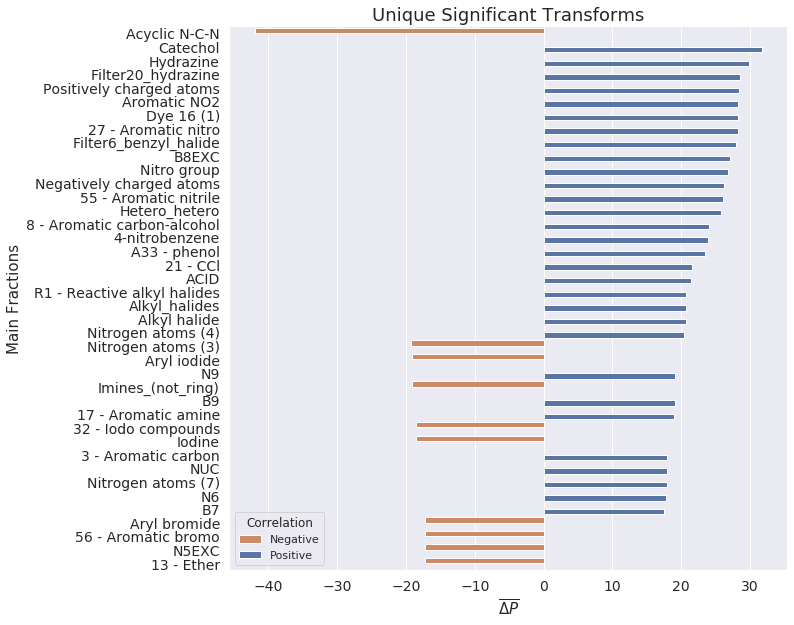

In [25]:
master_functions.plot_feats(res_neg_neg[:40])

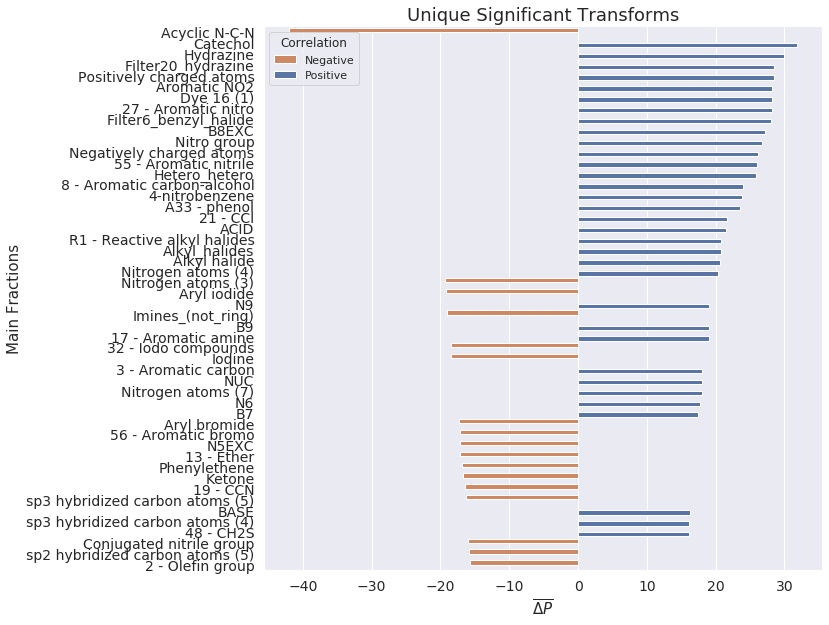

In [14]:
master_functions.plot_feats(res_neg_neg[:50])

## Old features

In [12]:
features_all_neg, l_feats_neg, r_feats_neg = master_functions.calculate_fractions_mk4(mmpa_zero_pos)


  1%|          | 22/2836 [00:00<00:13, 216.13it/s]

Generating molecular objects from pre-defined substructures
Calcualting LHS+RHS matches


100%|██████████| 2836/2836 [00:12<00:00, 225.67it/s]


In [13]:
to_drop = ['arene', 'heteroarene', 'alkyne', 'benzene ring', 'amine', 'azaarene', 'alkene', 'aryl halide', 'alkyl halide', 'leaving group', 'alkenyl halide']

features_all_dropped_neg = features_all_neg.drop(to_drop, axis = 1)

l_feats_dropped_neg =  l_feats_neg.drop(to_drop, axis = 1)
r_feats_dropped_neg =  r_feats_neg.drop(to_drop, axis = 1)

fr_sig_descriptors_neg_mk4 = master_functions.find_sig_feats_mk2(l_feats_neg, r_feats_neg, 0.01)

Found significant fractions:  43


In [16]:
res_neg_neg_mk4= master_functions.results_arr(features_all_neg, fr_sig_descriptors_neg_mk4, r_feats_neg, l_feats_neg, fractions_to_drop)

aniline has positive correlation 
arene has positive correlation 
azaarene has positive correlation 
benzene ring has negative correlation 
heteroarene has positive correlation 
phenol has positive correlation 
alkene has negative correlation 
alkyne has negative correlation 
percentage_loss 100
amidine has negative correlation 
second gain
['arene', ('benzene ring', 'amine'), 'heteroarene']
[56.41, 33.33, 23.08]
percentage_loss 100
aminal has negative correlation 
second gain
['carbonyl', ('carboxamide', 'alkanol'), 'secondary carboxamide']
[45.45, 33.33, 21.21]
amine has positive correlation 
primary amine has positive correlation 
percentage gain under -100
secondary amine has positive correlation 
tertiary amine has negative correlation 
enamine has negative correlation 
percentage_loss 100
hydrazine has positive correlation 
percentage gain under -100
hydrazone has negative correlation 
percentage_loss 100
iminyl has negative correlation 
nitrile has negative correlation 
second g

In [ ]:
res_neg_neg_mk4

In [17]:
master_functions.plot_feats(res_neg_neg_mk4)

# TSNE

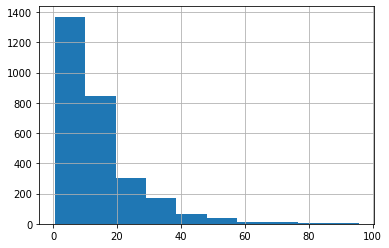

In [5]:
mmpa_zero_pos.measurement_delta.hist()

In [6]:
def get_it(smart):
    mol = Chem.MolFromSmarts(smart)
    mol.UpdatePropertyCache()
    FastFindRings(mol)
    return MACCSkeys.GenMACCSKeys(mol)

In [21]:
LHS=pd.DataFrame()
RHS=pd.DataFrame()
trans_fin_tsne=pd.DataFrame()

In [22]:
LHS['fps'] = mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['LHS'].apply(get_it)
RHS['fps'] = mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['RHS'].apply(get_it)

# LHS['fps'] = mmpa_zero_pos['LHS'].apply(get_it)
# RHS['fps'] = mmpa_zero_pos['RHS'].apply(get_it)


LHS['lab']='LHS'
RHS['lab']='RHS'

In [23]:
trans_fin_tsne_20=RHS.append(LHS)

In [11]:
trans_fin_tsne

fps  lab
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
...                                                 ...  ...
2831  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2832  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2833  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2834  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2835  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS

[5672 rows x 2 columns]

In [17]:
sample = trans_fin_tsne.sample(1192)

sample = trans_fin_tsne.sample(len(trans_fin_tsne))

tsne(sample['fps'], len(sample), 50, sample['lab'].values)

NameError: name 'tsne' is not defined

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2836 samples in 0.503s...
[t-SNE] Computed neighbors for 2836 samples in 21.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2836
[t-SNE] Computed conditional probabilities for sample 2000 / 2836
[t-SNE] Computed conditional probabilities for sample 2836 / 2836
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.979366
[t-SNE] KL divergence after 1000 iterations: 0.125014


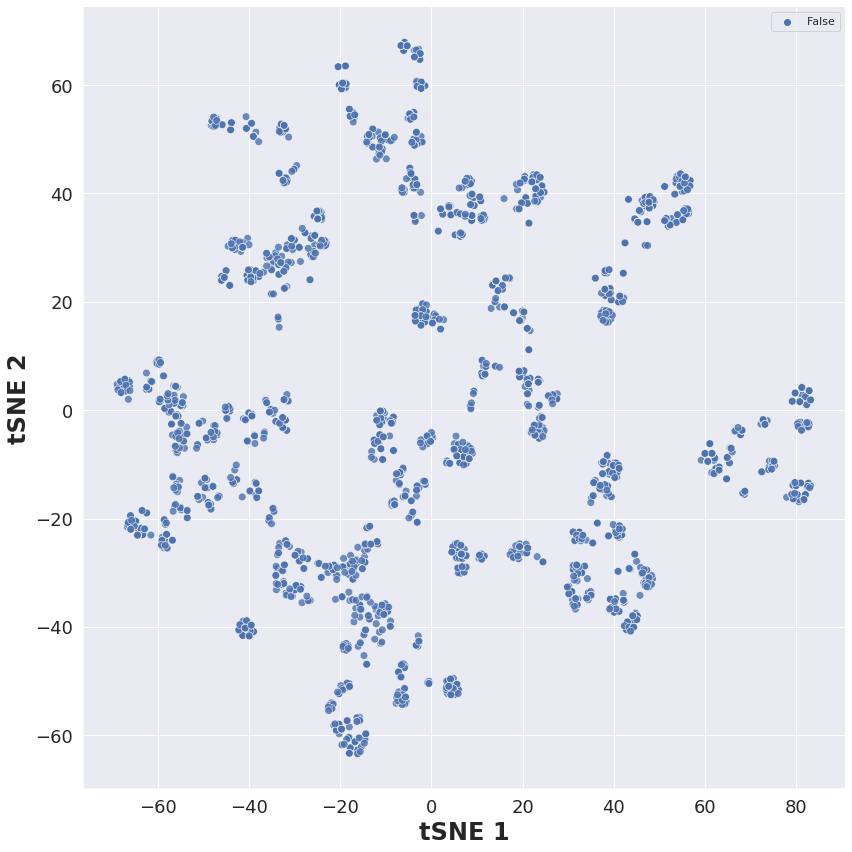

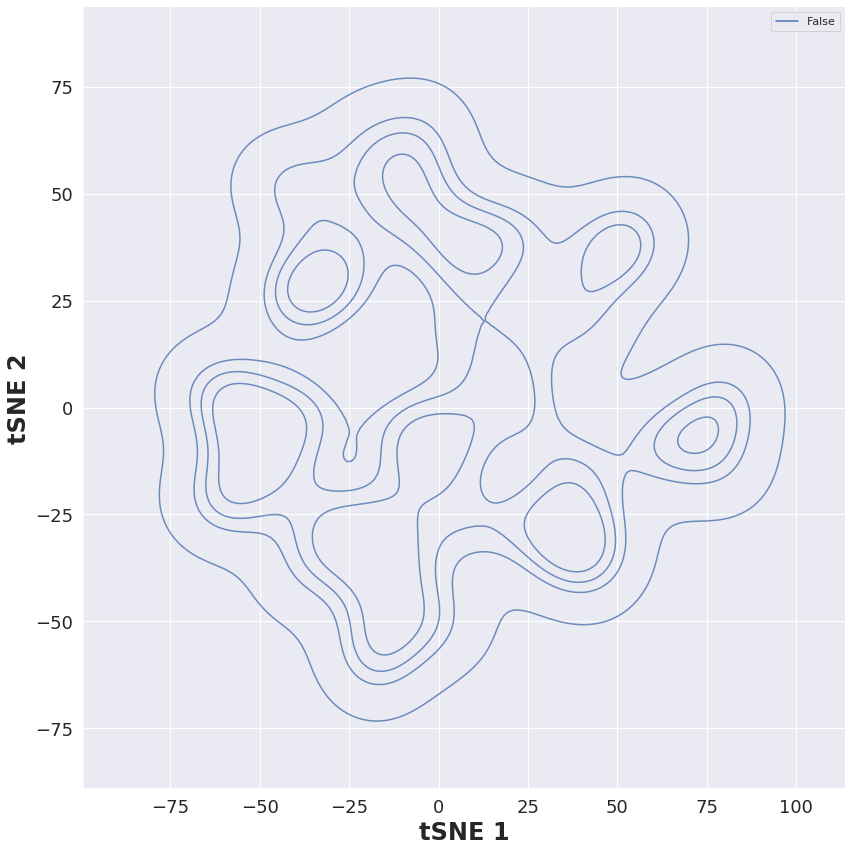

In [60]:
tsne(mmpa_zero_pos['LHS_fps'], len(mmpa_zero_pos), 50, label=False)

In [12]:
def tsne_two_plot(df, sample_size, perp, label ):
    
    sample = df.sample(sample_size).values

    tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(sample) # similartity matrix 
    n_mol = len(sample)
    similarity_matrix = np.ones([n_mol,n_mol])
    i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
    i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
    similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
    similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
    distance_matrix = np.subtract(1,similarity_matrix) 

    TSNE_sim = TSNE(verbose=1, n_components=2, init='pca', method='barnes_hut', perplexity=perp).fit_transform(distance_matrix) 
    
    tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) 
    
    plt.rcParams['axes.linewidth'] = 1.5
    fig, ax = plt.subplots(figsize=(12,12))

    ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result, s=60 ,alpha=0.5, hue=label) #, palette=["C0", "C1"])
    
    plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

    plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

    plt.tick_params ('both',width=2,labelsize=18)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()

    #ax.legend(handles=handles[1:], labels=labels[1:])

    #plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

    plt.tight_layout()
    plt.show()
    
    plt.rcParams['axes.linewidth'] = 1.5
    
    fig, ax = plt.subplots(figsize=(12,12))

    ax=sns.kdeplot(x='TC1',y='TC2',data=tsne_result,alpha=0.8, levels=10, hue=label) # , palette=["C0", "C1"])

    plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

    plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

    plt.tick_params ('both',width=2,labelsize=18)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    handles, labels = ax.get_legend_handles_labels()

    #ax.legend(handles=handles[1:], labels=labels[1:])

    #plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

    plt.tight_layout()
    plt.show()


In [13]:
def tsne_no_plot(df, perp):
    sample=df.values
    tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(sample) # similartity matrix 
    n_mol = len(sample)
    similarity_matrix = np.ones([n_mol,n_mol])
    i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
    i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
    similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
    similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
    distance_matrix = np.subtract(1,similarity_matrix) 

    TSNE_sim = TSNE(verbose=1, n_components=2, init='pca', method='barnes_hut', perplexity=perp).fit_transform(distance_matrix) 

    tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) 
    return tsne_result

In [20]:
trans_fin_tsne

fps  lab
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
...                                                 ...  ...
2831  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2832  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2833  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2834  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
2835  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS

[5672 rows x 2 columns]

In [24]:
tsne_20 = tsne_no_plot(trans_fin_tsne_20['fps'], perp= 50 )

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1192 samples in 0.423s...
[t-SNE] Computed neighbors for 1192 samples in 3.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1192
[t-SNE] Computed conditional probabilities for sample 1192 / 1192
[t-SNE] Mean sigma: 1.786195
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.304001
[t-SNE] KL divergence after 1000 iterations: 0.057531


In [163]:
trans_fin_tsne_20

fps  lab
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
..                                                 ...  ...
591  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
592  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
593  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
594  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS
595  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  LHS

[1192 rows x 2 columns]

In [164]:
tsne_20['lab']=trans_fin_tsne_20['lab'].reset_index(drop=True)

In [26]:
sns.scatterplot(x='TC1',y='TC2',data=tsne_20, s=20 ,alpha=1, hue=mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]) 

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 1192 and the vector passed to `hue` has length 596.

In [14]:
all_tsne = tsne_no_plot(trans_fin_tsne['fps'], perp= 50 )

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5672 samples in 6.572s...
[t-SNE] Computed neighbors for 5672 samples in 358.752s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5672
[t-SNE] Computed conditional probabilities for sample 2000 / 5672
[t-SNE] Computed conditional probabilities for sample 3000 / 5672
[t-SNE] Computed conditional probabilities for sample 4000 / 5672
[t-SNE] Computed conditional probabilities for sample 5000 / 5672
[t-SNE] Computed conditional probabilities for sample 5672 / 5672
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.135979
[t-SNE] KL divergence after 1000 iterations: 0.058454


In [16]:
sns.scatterplot(x='TC1',y='TC2',data=all_tsne, s=20 ,alpha=1, hue=mmpa_zero_pos['measurement_delta']) 

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 5672 and the vector passed to `hue` has length 596.

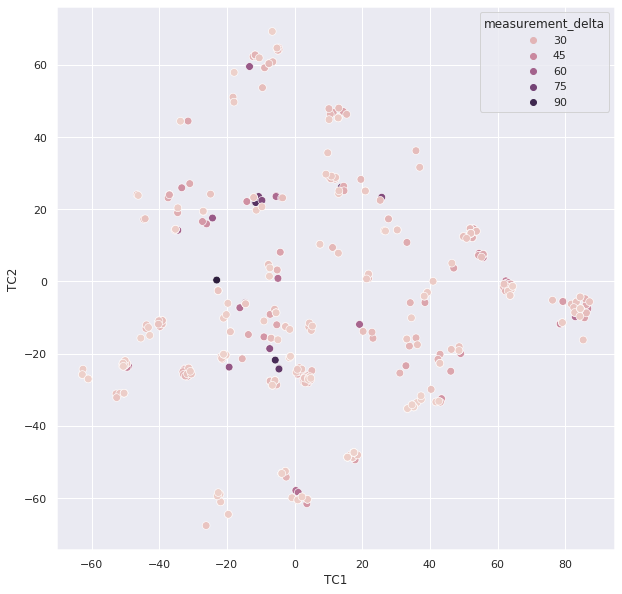

In [137]:
sns.scatterplot(x='TC1',y='TC2',data=tsne_RHS, s=60 ,alpha=1, hue=mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['measurement_delta']) 

In [17]:
trans_fin_tsne['lab'].reset_index(drop=True)

0       RHS
1       RHS
2       RHS
3       RHS
4       RHS
       ... 
5667    LHS
5668    LHS
5669    LHS
5670    LHS
5671    LHS
Name: lab, Length: 5672, dtype: object

In [198]:
len(all_tsne)

1192

In [222]:
pd.DataFrame(all_tsne.index)

0
0        0
1        1
2        2
3        3
4        4
...    ...
1187  1187
1188  1188
1189  1189
1190  1190
1191  1191

[1192 rows x 1 columns]

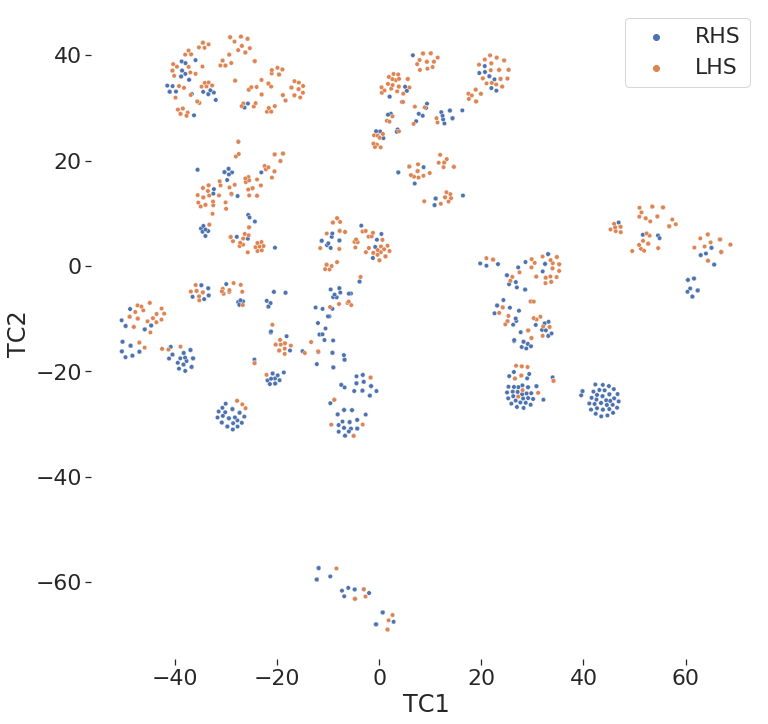

In [109]:
plt.rcParams['axes.linewidth'] = 0
# sns.set_style("white")
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(12,12))

ax = sns.scatterplot(x='TC1',y='TC2',data=tsne_20, s=20 ,alpha=1, hue=trans_fin_tsne_20['lab'].reset_index(drop=True).values) 

# sns.set(font_scale=2)
# sns.despine()

# sample=all_tsne.sample(200).reset_index(drop=True)


# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+0.2, point['y'], str(int(point['val'])))
#     return a, i, point
# b = label_point(sample.TC1, sample.TC2, pd.DataFrame(sample.index), plt.gca())

# plt.savefig('myfigure_200.png', dpi=400)


In [228]:
ax.text(point['x']+.02, point['y'], str(point['val']))

NameError: name 'point' is not defined

In [166]:
plot_rhs = tsne_20.iloc[:len(LHS)].reset_index(drop=True) # rhs
plot_lhs = tsne_20.iloc[len(RHS):].reset_index(drop=True) # lhs

In [168]:
plot_lhs

TC1        TC2  lab
0   -32.581795  12.227349  LHS
1   -18.871887  21.338564  LHS
2   -20.503195  21.188208  LHS
3   -20.503195  21.188208  LHS
4   -24.041571  33.976906  LHS
..         ...        ...  ...
591   9.317393  38.756496  LHS
592 -48.906483  -9.637964  LHS
593 -24.397203  38.887421  LHS
594  54.464500   9.416500  LHS
595 -18.531025 -15.687086  LHS

[596 rows x 3 columns]

In [126]:
plot_lhs

TC1        TC2
0   -32.581795  12.227349
1   -18.871887  21.338564
2   -20.503195  21.188208
3   -20.503195  21.188208
4   -24.041571  33.976906
..         ...        ...
591   9.317393  38.756496
592 -48.906483  -9.637964
593 -24.397203  38.887421
594  54.464500   9.416500
595 -18.531025 -15.687086

[596 rows x 2 columns]

In [169]:
concat_df = pd.concat([plot_lhs, plot_rhs,]).sort_index().reset_index(drop=True)


In [172]:
from toolz import interleave

concat_df = pd.DataFrame(interleave([plot_lhs.values, plot_rhs.values]), columns=['TC1', 'TC2', 'lab'])

In [173]:
concat_df

TC1        TC2  lab
0    -32.581795  12.227349  LHS
1    -29.995447  -3.428872  RHS
2    -18.871887  21.338564  LHS
3    -10.256588   3.955631  RHS
4    -20.503195  21.188208  LHS
...         ...        ...  ...
1187 -48.719261 -15.144259  RHS
1188  54.464500   9.416500  LHS
1189   1.616480 -69.021751  RHS
1190 -18.531025 -15.687086  LHS
1191 -30.168283  38.028313  RHS

[1192 rows x 3 columns]

In [233]:
concat_df.iloc[37]

TC1   -9.02393
TC2    -19.235
lab        RHS
Name: 37, dtype: object

In [228]:
sample['TC1'][19]

-7.461682319641113

In [229]:
sample['TC2'][19]

-22.565689086914062

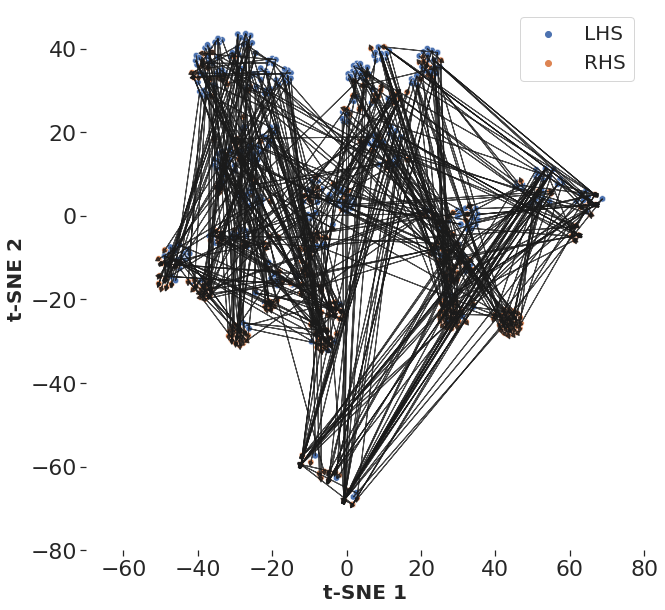

In [280]:
fig, ax = plt.subplots(figsize=(10,10))

ax  = sns.scatterplot(x='TC1',y='TC2',data=concat_df, s=40 ,alpha=1, hue=concat_df['lab'].values)

# plot an arrow 
sample=concat_df.iloc[264:266]

sample = concat_df
sample = sample.reset_index(drop=True)

ind=0
for i in range(int(len(sample)/2)):
    one=sample['TC1'][ind]
    two=sample['TC2'][ind]
    three= sample['TC1'][ind+1] - sample['TC1'][ind] 
    four=  sample['TC2'][ind+1] - sample['TC2'][ind]
    
    ax.arrow(one,two,three,four , width=0.001, color="k", head_width=1, head_length=1, overhang=-0.2, alpha=0.8)
    ind=ind+2

    
plt.xlabel ('t-SNE 1',fontsize=20,fontweight='bold')

plt.ylabel ('t-SNE 2',fontsize=20,fontweight='bold')

plt.legend(fontsize='20', title_fontsize='25')
    
lim=80
    
ax.set_ylim(-lim,50);
ax.set_xlim(-70,lim);


plt.savefig('myfigure_svg.svg')


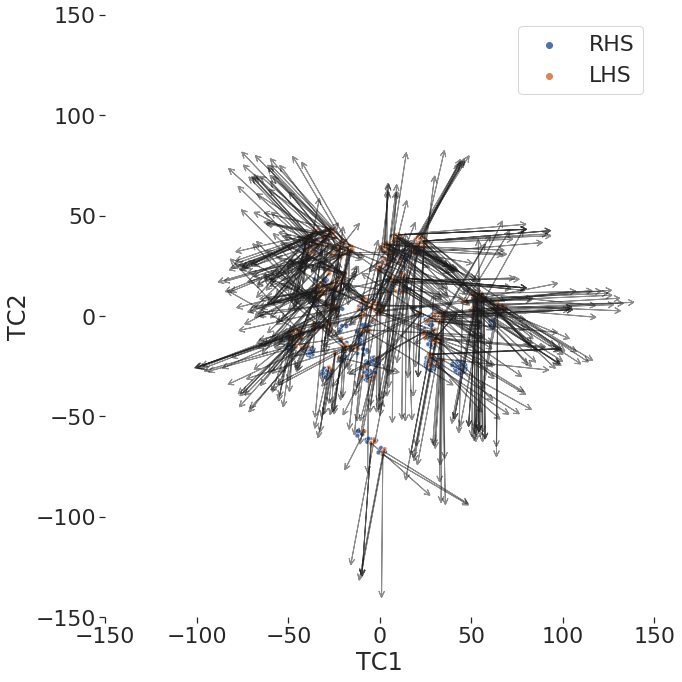

In [279]:

# sns.scatterplot(x='TC1',y='TC2',data=tsne_20, s=20 ,alpha=1, hue=trans_fin_tsne_20['lab'].reset_index(drop=True).values) 

lim=150
fig, ax = plt.subplots(figsize=(10,10))
ind=0

ax  = sns.scatterplot(x='TC1',y='TC2',data=tsne_20, s=20 ,alpha=1, hue=trans_fin_tsne_20['lab'].reset_index(drop=True).values) 

# sample = concat_df.sample(1192).reset_index(drop=True)

sample = concat_df

for i in range(int(len(sample)/2)):
    ax.arrow(sample['TC1'][ind] ,sample['TC2'][ind], sample['TC1'][ind+1], sample['TC2'][ind+1], width=0.001, color="k", head_width=3, head_length=3, overhang=1, alpha=0.5)
    ind=ind+2
    
ax.set_ylim(-lim,lim)
ax.set_xlim(-lim,lim)

plt.tight_layout()
plt.show()

NameError: name 'overhang' is not defined

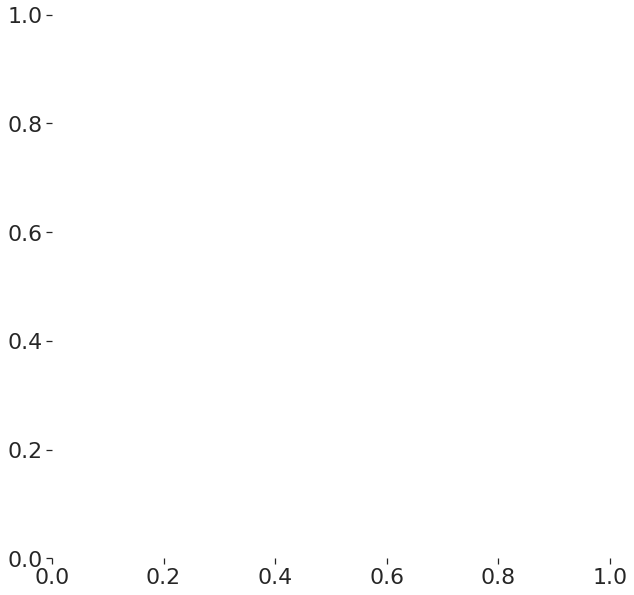

In [111]:
fig, ax = plt.subplots(figsize=(10,10))

v = [-0.2, 0, .2, .4, .6, .8, 1]

for i in v:
    print(i, overhang)
    ax.arrow(.1, 0.5, .6, 0, width=0.0001, color="k", head_width=0.01, head_length=0.05, overhang=-0.2)

ax.set_yticks(v)
ax.set_xticks([])
ax.set_ylabel("overhang")
ax.set_ylim(-0.3,1.1)
plt.tight_layout()
plt.show()

In [44]:
plot_rhs['lhs_tc1'] = plot_lhs['TC1'].reset_index(drop=True)

/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
plot_rhs['lhs_tc2'] = plot_lhs['TC2'].reset_index(drop=True)

/homes/dgurvic/software/miniconda3/envs/jupt_test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
try_plot=pd.DataFrame(plot_rhs[['TC1', 'TC2']].values, columns=(['rhs_1', 'rhs_2']))

In [1]:
plot_rhs

NameError: name 'plot_rhs' is not defined

In [ ]:
sns.scatterplot(data = plot_rhs)

In [152]:
list(trans_fin_tsne['fps'])

 ...]

In [147]:
trans_fin_tsne[trans_fin_tsne['lab']=='RHS']

fps  lab
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
...                                                 ...  ...
2831  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2832  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2833  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2834  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS
2835  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  RHS

[2836 rows x 2 columns]

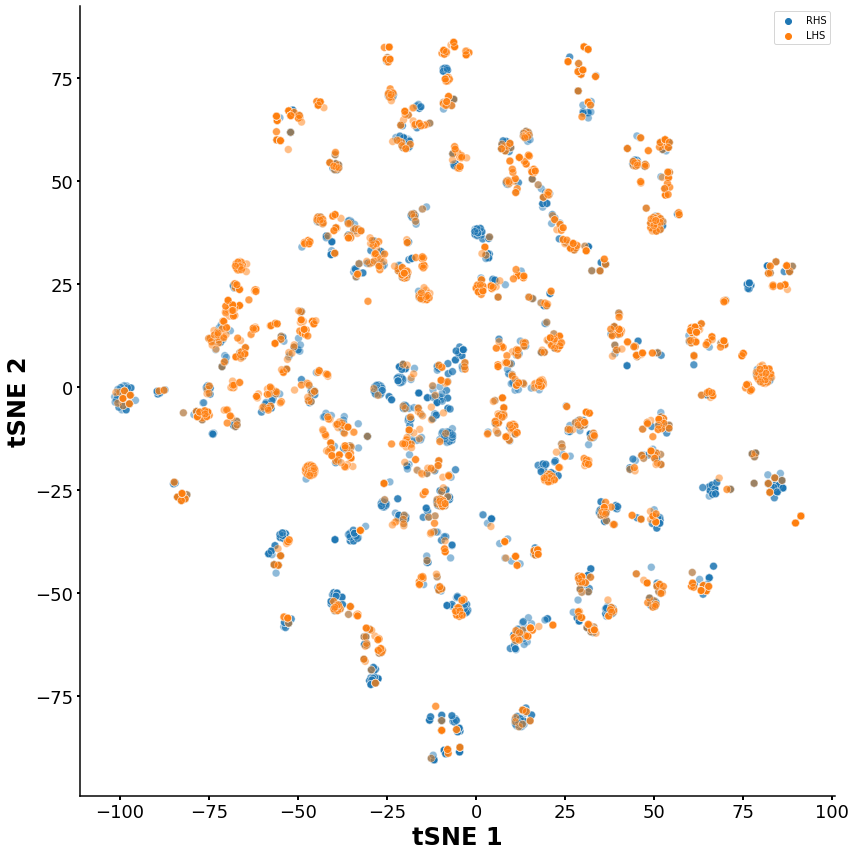

In [18]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(12,12))

ax=sns.scatterplot(x='TC1',y='TC2',data=all_tsne, s=60 ,alpha=0.5, hue=trans_fin_tsne['lab'].reset_index(drop=True).values) #, palette=["C0", "C1"])

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()

#ax.legend(handles=handles[1:], labels=labels[1:])

#plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

plt.tight_layout()
plt.show()

plt.rcParams['axes.linewidth'] = 1.5

fig, ax = plt.subplots(figsize=(12,12))

ax=sns.kdeplot(x='TC1',y='TC2',data=all_tsne,alpha=0.8, levels=5, hue=trans_fin_tsne['lab'].reset_index(drop=True).values) # , palette=["C0", "C1"])

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()

#ax.legend(handles=handles[1:], labels=labels[1:])

#plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

plt.tight_layout()
plt.show()

## Molecular similarity of LHS and RHS

In [162]:
GetTanimotoSimMat(RHS['fps'])

array([0.18367347, 0.25      , 0.34090909, ..., 0.03333333, 0.13513514,
       0.05128205])

In [176]:
def self_sim_fps(fps1 ):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps1)
    for i in range(1, nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps1[i],fps1[:])
        dists.append([1-x for x in sims])

    return dists

In [177]:
def two_sims_fps(fps1, fps2 ):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps1)
    for i in range(1, nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps1[i],fps2[:])
        dists.append([1-x for x in sims])

    return dists

In [173]:
mat = two_sims_fps(RHS['fps'], LHS['fps'])

In [184]:
mat_self_rhs = self_sim_fps(RHS['fps'])
mat_self_lhs = self_sim_fps(LHS['fps'])

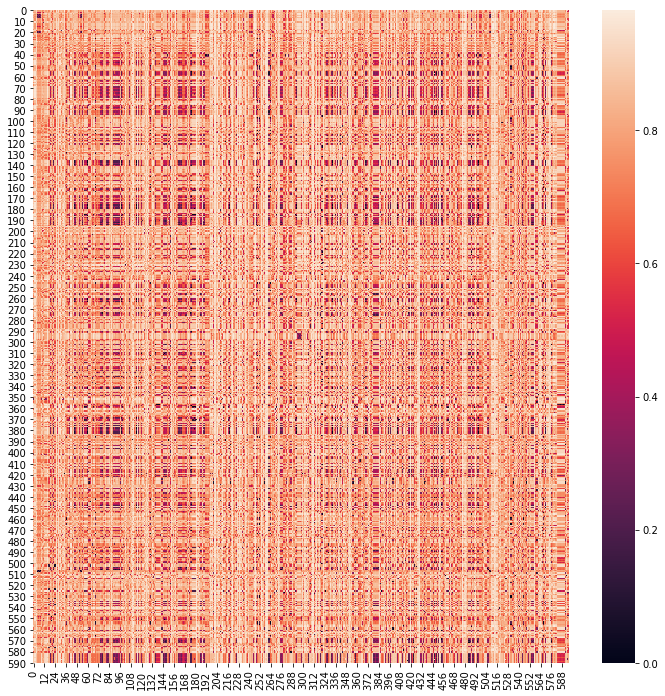

In [175]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(12,12))

ax = sns.heatmap(mat)

In [180]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(12,12))

ax = sns.heatmap(mat_self)

In [185]:
np.array(mat_self_lhs).mean()

0.7909047883391832

In [186]:
np.array(mat_self_rhs).mean()

0.7328163497949659

In [58]:
mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20][:25]

smirks  dof      t-stat  \
0   [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O    3  107.830725   
1   [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...    2   19.757254   
2   [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1]Nc1cn([*:2]...    2   19.569437   
3   [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...    2   19.372677   
4                     [*:1]C1CC1>>[*:1]c1ccc2ccccc2n1    3    4.139237   
5             [*:1]C(=O)c1ccc(N)cc1>>[*:1]c1cccc(N)c1    2   23.769812   
6           [*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1cccc(N)c1    2   23.769812   
7             [*:1]C(=O)c1ccc(N)cc1>>[*:1]c1ccc(N)cc1    2   23.287423   
8           [*:1]CC(=O)c1ccc(N)cc1>>[*:1]Cc1ccc(N)cc1    2   23.287423   
9   [*:1]CNC(=O)CC(CO)NC[*:2]>>[*:1]N=Nc1nc(C)c(N=...    3  110.123051   
10  [*:1]N/N=C(\C)c1ccc([*:2])cc1>>[*:1]N=Nc1nc(C)...    2    9.989805   
11  [*:1]N/N=C(\[*:2])c1ccc([*:3])cc1>>[*:1]N=Nc1n...    2    9.989805   
12  [*:1]C(=O)C[P+]([*:2])([*:3])c1ccccc1>>[*:1]C[...    3   13.438120   
13  [*:1]CNC(=O)CC([*:2])CO>>[*:1]Nc1nc([*:2])nc(N...    3   99.828054   
14  [*:1]CNC(=O)CC(CO)N[*:2]>>[*:1]Nc1nc(N[*:2])nc...    3   99.828054   
15  [*:1]CNC(CO)CC(=O)N[*:2]>>[*:1]Nc1nc(N[*:2])nc...    3   99.828054   
16  [*:1]/C=N/C([*:2])/N=C/[*:3]>>[*:1][P+]([*:2])...    2   16.580024   
17  [*:1]CC1CN(C(=O)O[*:2])OC1=O>>[*:1]Nc1nc(N[*:2...    3   61.977459   
18  [*:1]COC(=O)N1CC([*:2])C(=O)O1>>[*:1]Nc1nc(N[*...    3   61.977459   
19   [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1    4   13.118171   
20   [*:1]CC(=O)c1ccc([*:2])cc1>>[*:1]c1cccc([*:2])c1    2   19.784493   
21           [*:1]CC(=O)c1ccc(N)cc1>>[*:1]c1cccc(N)c1    2   19.784493   
22  [*:1]c1[nH]c([*:2])c(C)c1[*:3]>>[*:3]c1[nH]c(C...    2   96.897924   
23  [*:1]c1cc(Br)cc(Br)c1OC>>[*:1]c1ccc([N+](=O)[O...    3    8.734030   
24  [*:1]COC(=O)N1CC([*:2])C(O)O1>>[*:1]Nc1nc(N[*:...    3   27.402856   

    p-val (t-test)  measurement_delta        std        sem  \
0         0.000002          95.750000   1.775932   0.887966   
1         0.002552          88.363333   7.746511   4.472450   
2         0.002601          87.523333   7.746511   4.472450   
3         0.002654          86.643333   7.746511   4.472450   
4         0.025600          86.630000  41.857952  20.928976   
5         0.001765          84.753333   6.175778   3.565587   
6         0.001765          84.753333   6.175778   3.565587   
7         0.001839          83.033333   6.175778   3.565587   
8         0.001839          83.033333   6.175778   3.565587   
9         0.000002          82.365000   1.495872   0.747936   
10        0.009872          80.103333  13.888464   8.018508   
11        0.009872          80.103333  13.888464   8.018508   
12        0.000891          77.820000  11.581977   5.790989   
13        0.000002          74.665000   1.495872   0.747936   
14        0.000002          74.665000   1.495872   0.747936   
15        0.000002          74.665000   1.495872   0.747936   
16        0.003618          74.153333   7.746511   4.472450   
17        0.000009          73.940000   2.386029   1.193014   
18        0.000009          73.940000   2.386029   1.193014   
19        0.000195          71.330000  12.158610   5.437496   
20        0.002545          70.543333   6.175778   3.565587   
21        0.002545          70.543333   6.175778   3.565587   
22        0.000106          69.283333   1.238440   0.715014   
23        0.003160          69.107500  15.824882   7.912441   
24        0.000107          67.165000   4.902044   2.451022   

                                      LHS  \
0                     [*:1]CNC(=O)CO[*:2]   
1            [*:1]/C=N/C([*:2])/N=C/[*:3]   
2            [*:1]/C=N/C([*:2])/N=C/[*:3]   
3            [*:1]/C=N/C([*:2])/N=C/[*:3]   
4                              [*:1]C1CC1   
5                   [*:1]C(=O)c1ccc(N)cc1   
6                  [*:1]CC(=O)c1ccc(N)cc1   
7                   [*:1]C(=O)c1ccc(N)cc1   
8                  [*:1]CC(=O)c1ccc(N)cc1   
9               [*:1]CNC(=O)CC(CO

In [59]:
output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]

compound_structure_A  \
25055       C(CNc(cc1)ccc1C)(=O)N\N=C\c(ccc(c2I)OC)c2   
29517  C(CNc1cccc(cccc2)c12)(=O)N\N=C\c(ccc(c3I)OC)c3   
30997         C(CNc1ccccc1C)(=O)N\N=C\c(ccc(c2I)OC)c2   
39548      C(COc(cc1)ccc1Cl)(=O)N\N=C\c(ccc(c2I)OC)c2   
40117    C(COc1ccc(cc1Br)Cl)(=O)N\N=C\c(ccc(c2I)OC)c2   

                                    compound_structure_B  idsmiles_A  \
25055    c1(ccc(\C=N\NC(CNc(cc2)ccc2C)=O)o1)[N+](=O)[O-]       46939   
29517  c1(ccc(\C=N\NC(CNc2cccc(cccc3)c23)=O)o1)[N+](=...       14763   
30997      c1(ccc(\C=N\NC(CNc2ccccc2C)=O)o1)[N+](=O)[O-]       41863   
39548   c1(ccc(\C=N\NC(COc(cc2)ccc2Cl)=O)o1)[N+](=O)[O-]       42337   
40117  c1(ccc(\C=N\NC(COc2ccc(cc2Br)Cl)=O)o1)[N+](=O)...       39222   

       idsmiles_B                                            smirks  \
25055        9062  [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1   
29517       12450  [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1   
30997       10553  [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1   
39548       14589  [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1   
40117       11161  [*:1]c1ccc(OC)c(I)c1>>[*:1]c1ccc([N+](=O)[O-])o1   

                            common_core  measurement_A  measurement_B  \
25055     [*:1]/C=N/NC(=O)CNc1ccc(C)cc1           1.92          75.61   
29517  [*:1]/C=N/NC(=O)CNc1cccc2ccccc12          10.12          84.69   
30997       [*:1]/C=N/NC(=O)CNc1ccccc1C           4.64          78.07   
39548    [*:1]/C=N/NC(=O)COc1ccc(Cl)cc1           3.22          54.25   
40117  [*:1]/C=N/NC(=O)COc1ccc(Cl)cc1Br           0.56          84.49   

       measurement_delta                   LHS                         RHS  
25055              73.69  [*:1]c1ccc(OC)c(I)c1  [*:1]c1ccc([N+](=O)[O-])o1  
29517              74.57  [*:1]c1ccc(OC)c(I)c1  [*:1]c1ccc([N+](=O)[O-])o1  
30997              73.43  [*:1]c1ccc(OC)c(I)c1  [*:1]c1ccc([N+](=O)[O-])o1  
39548              51.03  [*:1]c1ccc(OC)c(I)c1  [*:1]c1ccc([N+](=O)[O-])o1  
40117              83.93  [*:1]c1ccc(OC)c(I)c1  [*:1]c1ccc([N+](=O)[O-])o1

In [51]:
output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][0]]['smirks']

701938    [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O
701984    [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O
702030    [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O
702076    [*:1]CNC(=O)CO[*:2]>>[*:1]N1C(=O)C(O)=CC1([*:2])O
Name: smirks, dtype: object

In [50]:
output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][0]]['common_core']

701938    [*:2]c1ccc(OC)cc1.[*:1]c1ccccc1
701984    [*:2]c1ccc(OC)cc1.[*:1]c1ccccc1
702030    [*:2]c1ccc(OC)cc1.[*:1]c1ccccc1
702076    [*:2]c1ccc(OC)cc1.[*:1]c1ccccc1
Name: common_core, dtype: object

In [83]:
comp_a = Chem.MolFromSmiles(output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]['compound_structure_A'].iloc[0])

In [84]:
comp_b = Chem.MolFromSmiles(output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]['compound_structure_B'].iloc[0])

In [62]:
Chem.MolFromSmiles(output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]['common_core'].iloc[0])

In [82]:
lhs = Chem.MolFromSmiles(output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]['LHS'].iloc[0])

In [80]:
rhs = Chem.MolFromSmiles(output[output['smirks']==mmpa_zero_pos[mmpa_zero_pos['measurement_delta']>20]['smirks'][19]]['RHS'].iloc[0])

In [77]:
def DrawMol(mol, molSize=(450,450), kekulize=True):
#     mc = Chem.MolFromSmiles(mol)
    mc = mol
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        Chem.rdDepictor.Compute2DCoords(mc)

    drawer = rdMolDraw2D.MolDraw2DSVG(*molSize)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:', '')
    svg = re.sub(pattern, '', svg)
    return svg


# def save_mol_svg(mol, svg_name):
    

In [78]:
from rdkit.Chem.Draw import rdMolDraw2D
import re
pattern = re.compile("<\?xml.*\?>")

In [88]:
with open('comp_b.svg', 'w') as f:
    f.write(DrawMol(comp_b))